Lisa Ho Yen Xin 20297507

# [1] Import Functions

## [1.1] Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%run /content/drive/MyDrive/FYP/ImportFunctions.ipynb

## [1.2] Jupyter

In [ ]:
%run ImportFunctions.ipynb

# [2] Import Libraries

In [3]:
import cv2
import numpy as np
import seaborn as sns
from keras.utils import plot_model
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_recall_fscore_support,
)
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import tensorflow as tf

# [3] Load Dataset

## [3.1] Google Colab

In [4]:
# Load images and labels
images = np.load('/content/drive/My Drive/FYP/dataset/images460.npy')
labels = np.load('/content/drive/My Drive/FYP/dataset/labels460.npy')

## [3.2] Jupyter

In [ ]:
# Load images and labels
images = np.load('dataset/images460.npy')
labels = np.load('dataset/labels460.npy')

# [4] Prepare Dataset

In [ ]:
images = resize_images(images, (224,224))

In [5]:
# Display array shapes
display_array_shapes(images, labels)

+--------------+--------------------+
| Array Name   | Shape              |
+==============+====================+
| Images       | (460, 299, 299, 3) |
+--------------+--------------------+
| Labels       | (460,)             |
+--------------+--------------------+


In [6]:
# Count the number of occurrences of each label
label_counts = Counter(labels)

# Display the counts in a table
display_label_counts(label_counts)

Label	Count
----------------
Abelmoschus esculentus	75
Abelmoschus moschatus	31
Abroma augustum	37
Abrus precatorius	20
Acacia auriculiformis	153
Acacia decurrens	13
Acacia mangium	111
Acalypha alopecuroidea	10
Acalypha arvensis	10


In [ ]:
# Get the number of unique labels
num_classes = len(np.unique(labels))

print("Number of unique labels:", num_classes)

Number of unique labels: 9


In [ ]:
# Binarize labels
labels_binarized = binarize_labels(labels)

# [5] Train Model

In [ ]:
# Split the data into training and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels_binarized, test_size=0.2, random_state=42)

# Further split the temporary data into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (368, 224, 224, 3) (368, 9)
Validation shape: (46, 224, 224, 3) (46, 9)
Test shape: (46, 224, 224, 3) (46, 9)


## [5.1] VGG-19

In [ ]:
# Build and compile VGG19 model
vgg19_model = build_and_compile_vgg19_model(num_classes)

2024-03-22 17:03:26.242350: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-03-22 17:03:26.242387: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LSPMHPCHN01): /proc/driver/nvidia/version does not exist
2024-03-22 17:03:26.242656: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# Train the model
vgg19_history = vgg19_model.fit(X_train, y_train, batch_size=42, validation_data=(X_val, y_val), epochs=10)

# Evaluate the model on the validation data
vgg19_loss, vgg19_accuracy = vgg19_model.evaluate(X_val, y_val)

Epoch 1/10


2024-03-22 17:03:28.766036: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 221577216 exceeds 10% of free system memory.
2024-03-22 17:03:29.960695: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 539492352 exceeds 10% of free system memory.
2024-03-22 17:03:30.149082: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 539492352 exceeds 10% of free system memory.
2024-03-22 17:03:30.463934: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 269746176 exceeds 10% of free system memory.
2024-03-22 17:03:30.533199: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 269746176 exceeds 10% of free system memory.


9/9 [==============================] - 14s 1s/step - loss: 3.0333 - accuracy: 0.2609 - val_loss: 3.3330 - val_accuracy: 0.2391
Epoch 2/10
9/9 [==============================] - 11s 1s/step - loss: 1.4264 - accuracy: 0.5082 - val_loss: 1.9213 - val_accuracy: 0.4348
Epoch 3/10
9/9 [==============================] - 12s 1s/step - loss: 0.7749 - accuracy: 0.7663 - val_loss: 2.0319 - val_accuracy: 0.3913
Epoch 4/10
9/9 [==============================] - 11s 1s/step - loss: 0.4674 - accuracy: 0.8614 - val_loss: 1.7122 - val_accuracy: 0.3261
Epoch 5/10
9/9 [==============================] - 12s 1s/step - loss: 0.2697 - accuracy: 0.9565 - val_loss: 1.6689 - val_accuracy: 0.3478
Epoch 6/10
9/9 [==============================] - 11s 1s/step - loss: 0.1853 - accuracy: 0.9783 - val_loss: 1.6921 - val_accuracy: 0.3478
Epoch 7/10
9/9 [==============================] - 11s 1s/step - loss: 0.1418 - accuracy: 0.9783 - val_loss: 1.6387 - val_accuracy: 0.4348
Epoch 8/10
9/9 [=============================

In [ ]:
# Calculate average loss and accuracy
vgg19_average_loss = sum(vgg19_history.history['val_loss']) / len(vgg19_history.history['val_loss'])
vgg19_average_accuracy = sum(vgg19_history.history['val_accuracy']) / len(vgg19_history.history['val_accuracy'])

print(f"Average Validation Loss: {vgg19_average_loss}, Average Validation Accuracy: {vgg19_average_accuracy}")

Average Validation Loss: 1.9112053036689758, Average Validation Accuracy: 0.35652174055576324


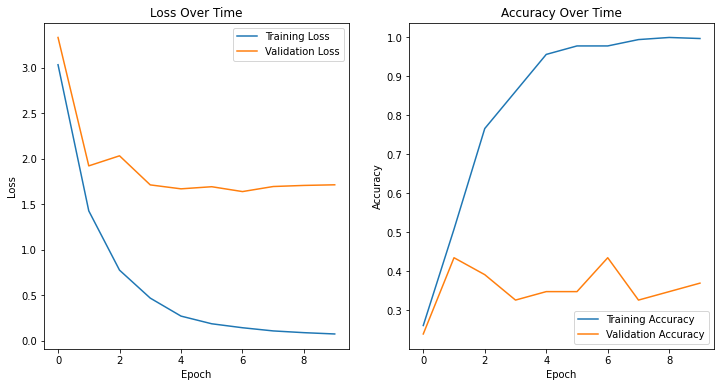

In [ ]:
plot_training_history(vgg19_history)

## [5.2] ResNet-101

In [ ]:
# Build and compile ResNet101 model
resnet101_model = build_and_compile_resnet101_model(num_classes)

In [ ]:
# Train the model
resnet101_history = resnet101_model.fit(X_train, y_train, batch_size=42, validation_data=(X_val, y_val), epochs=10)

# Evaluate the model on the validation data
resnet101_loss, resnet101_accuracy = resnet101_model.evaluate(X_val, y_val)

Epoch 1/10
9/9 [==============================] - 17s 2s/step - loss: 6.4672 - accuracy: 0.2391 - val_loss: 5.7395 - val_accuracy: 0.0435
Epoch 2/10
9/9 [==============================] - 13s 1s/step - loss: 4.8508 - accuracy: 0.2527 - val_loss: 4.3118 - val_accuracy: 0.2609
Epoch 3/10
9/9 [==============================] - 13s 1s/step - loss: 3.2127 - accuracy: 0.2962 - val_loss: 3.4555 - val_accuracy: 0.2391
Epoch 4/10
9/9 [==============================] - 13s 1s/step - loss: 2.2947 - accuracy: 0.3261 - val_loss: 1.8290 - val_accuracy: 0.4783
Epoch 5/10
9/9 [==============================] - 13s 1s/step - loss: 1.8052 - accuracy: 0.4348 - val_loss: 1.8051 - val_accuracy: 0.4130
Epoch 6/10
9/9 [==============================] - 13s 1s/step - loss: 1.6786 - accuracy: 0.3967 - val_loss: 2.4784 - val_accuracy: 0.2391
Epoch 7/10
9/9 [==============================] - 13s 1s/step - loss: 1.5548 - accuracy: 0.4402 - val_loss: 2.1765 - val_accuracy: 0.3261
Epoch 8/10
9/9 [==================

In [ ]:
# Calculate average loss and accuracy
resnet101_average_loss = sum(resnet101_history.history['val_loss']) / len(resnet101_history.history['val_loss'])
resnet101_average_accuracy = sum(resnet101_history.history['val_accuracy']) / len(resnet101_history.history['val_accuracy'])

print(f"Average Validation Loss: {resnet101_average_loss}, Average Validation Accuracy: {resnet101_average_accuracy}")

Average Validation Loss: 2.7505125164985658, Average Validation Accuracy: 0.29347826056182386


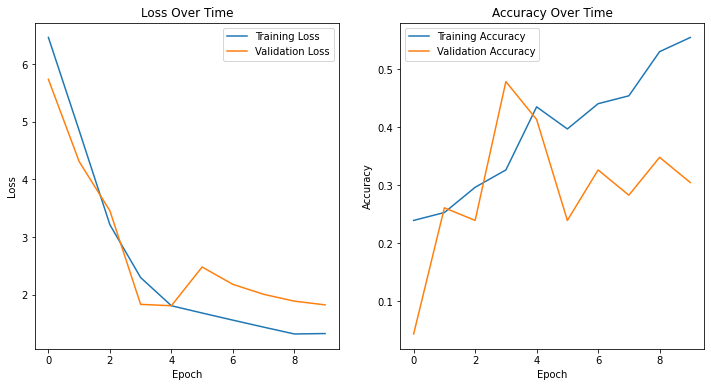

In [ ]:
# Plot training history
plot_training_history(resnet101_history)

## [5.3] MobileNetV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2

# Build and compile MobileNetV3 model
mobilenetv2_model = build_and_compile_mobilenetv2_model(num_classes)

In [ ]:
# Train the model
mobilenetv2_history = mobilenetv2_model.fit(X_train, y_train, batch_size=42, validation_data=(X_val, y_val), epochs=10)

# Evaluate the model on the validation data
mobilenetv2_loss, mobilenetv2_accuracy = mobilenetv2_model.evaluate(X_val, y_val)

Epoch 1/10
9/9 [==============================] - 5s 313ms/step - loss: 15.7078 - accuracy: 0.2582 - val_loss: 12.4948 - val_accuracy: 0.3696
Epoch 2/10
9/9 [==============================] - 2s 272ms/step - loss: 4.3255 - accuracy: 0.7283 - val_loss: 7.8147 - val_accuracy: 0.5870
Epoch 3/10
9/9 [==============================] - 2s 277ms/step - loss: 0.2936 - accuracy: 0.9429 - val_loss: 10.3346 - val_accuracy: 0.4783
Epoch 4/10
9/9 [==============================] - 2s 279ms/step - loss: 0.2590 - accuracy: 0.9565 - val_loss: 7.4546 - val_accuracy: 0.5870
Epoch 5/10
9/9 [==============================] - 2s 274ms/step - loss: 0.0090 - accuracy: 0.9973 - val_loss: 7.8166 - val_accuracy: 0.6087
Epoch 6/10
9/9 [==============================] - 2s 275ms/step - loss: 9.1622e-04 - accuracy: 1.0000 - val_loss: 7.8708 - val_accuracy: 0.6087
Epoch 7/10
9/9 [==============================] - 2s 272ms/step - loss: 4.7462e-04 - accuracy: 1.0000 - val_loss: 7.9418 - val_accuracy: 0.6304
Epoch 8/1

In [ ]:
# Calculate average loss and accuracy
mobilenetv2_average_loss = sum(mobilenetv2_history.history['val_loss']) / len(mobilenetv2_history.history['val_loss'])
mobilenetv2_average_accuracy = sum(mobilenetv2_history.history['val_accuracy']) / len(mobilenetv2_history.history['val_accuracy'])

print(f"Average Validation Loss: {mobilenetv2_average_loss}, Average Validation Accuracy: {mobilenetv2_average_accuracy}")

Average Validation Loss: 8.562926864624023, Average Validation Accuracy: 0.5804347842931747


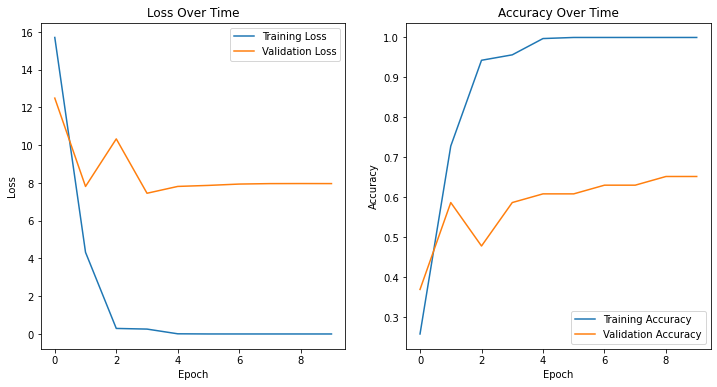

In [ ]:
# Plot training history
plot_training_history(mobilenetv2_history)

## [5.4] EfficientNet-B0

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

# Build and compile EfficientNet model
efficientnet_model = build_and_compile_efficientnet_model(num_classes)

In [ ]:
# Train the model
efficientnet_history = efficientnet_model.fit(X_train, y_train, batch_size=42, validation_data=(X_val, y_val), epochs=10)

# Evaluate the model on the validation data
efficientnet_loss, efficientnet_accuracy = efficientnet_model.evaluate(X_val, y_val)

Epoch 1/10
9/9 [==============================] - 10s 669ms/step - loss: 16.9627 - accuracy: 0.2228 - val_loss: 12.8388 - val_accuracy: 0.2609
Epoch 2/10
9/9 [==============================] - 4s 478ms/step - loss: 11.8184 - accuracy: 0.1984 - val_loss: 15.7271 - val_accuracy: 0.2609
Epoch 3/10
9/9 [==============================] - 4s 453ms/step - loss: 9.8257 - accuracy: 0.2120 - val_loss: 6.6095 - val_accuracy: 0.0217
Epoch 4/10
9/9 [==============================] - 4s 472ms/step - loss: 5.0118 - accuracy: 0.1630 - val_loss: 5.8713 - val_accuracy: 0.2391
Epoch 5/10
9/9 [==============================] - 4s 480ms/step - loss: 4.7350 - accuracy: 0.2201 - val_loss: 5.7020 - val_accuracy: 0.0217
Epoch 6/10
9/9 [==============================] - 4s 489ms/step - loss: 3.8560 - accuracy: 0.1929 - val_loss: 3.6873 - val_accuracy: 0.2609
Epoch 7/10
9/9 [==============================] - 4s 489ms/step - loss: 2.8989 - accuracy: 0.2717 - val_loss: 3.8718 - val_accuracy: 0.2391
Epoch 8/10
9/9 

In [ ]:
# Calculate average loss and accuracy
efficientnet_average_loss = sum(efficientnet_history.history['val_loss']) / len(efficientnet_history.history['val_loss'])
efficientnet_average_accuracy = sum(efficientnet_history.history['val_accuracy']) / len(efficientnet_history.history['val_accuracy'])

print(f"Average Validation Loss: {efficientnet_average_loss}, Average Validation Accuracy: {efficientnet_average_accuracy}")

Average Validation Loss: 6.1782146215438845, Average Validation Accuracy: 0.2065217386931181


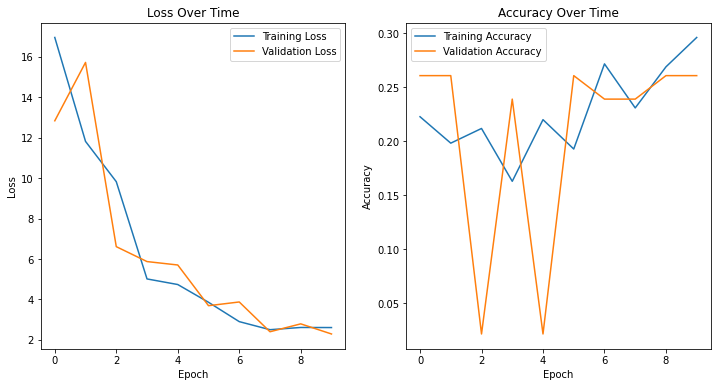

In [ ]:
# Plot training history
plot_training_history(efficientnet_history)

# [6] Save Model

## [6.1] Google Colab

In [ ]:
# Save models
vgg19_model.save('/content/drive/MyDrive/FYP/models/VGG19_ori')
resnet101_model.save('/content/drive/MyDrive/FYP/models/ResNet101_ori')
mobilenetv2_model.save('/content/drive/MyDrive/FYP/models/MobileNetV2_ori')
efficientnet_model.save('/content/drive/MyDrive/FYP/models/EfficientNetB0_ori')

PermissionDeniedError: /content; Permission denied

## [6.2] Jupyter

In [ ]:
# Save models
vgg19_model.save('models/VGG19_ori')
resnet101_model.save('models/ResNet101_ori')
mobilenetv2_model.save('models/MobileNetV2_ori')

# Save EfficientNet model in SavedModel format
tf.saved_model.save(efficientnet_model, 'models/EfficientNetB0_ori')

INFO:tensorflow:Assets written to: models/VGG19_ori/assets


INFO:tensorflow:Assets written to: models/VGG19_ori/assets


INFO:tensorflow:Assets written to: models/ResNet101_ori/assets


INFO:tensorflow:Assets written to: models/ResNet101_ori/assets


INFO:tensorflow:Assets written to: models/MobileNetV2_ori/assets


INFO:tensorflow:Assets written to: models/MobileNetV2_ori/assets


INFO:tensorflow:Assets written to: models/EfficientNetB0_ori/assets


INFO:tensorflow:Assets written to: models/EfficientNetB0_ori/assets


# [6] Load Model

## [6.1] Google Colab

In [ ]:
# Load the saved models
loaded_vgg19_model = tf.keras.models.load_model('/content/drive/MyDrive/FYP/models/VGG19_ori')
loaded_resnet101_model = tf.keras.models.load_model('/content/drive/MyDrive/FYP/models/ResNet101_ori')
loaded_mobilenetv2_model = tf.keras.models.load_model('/content/drive/MyDrive/FYP/models/MobileNetV2_ori')
loaded_efficientnet_model = tf.keras.models.load_model('/content/drive/MyDrive/FYP/models/EfficientNetB0_ori')

## [6.2] Jupyter

In [ ]:
# Load the saved models
loaded_vgg19_model = tf.keras.models.load_model('models/VGG19_ori')
loaded_resnet101_model = tf.keras.models.load_model('models/ResNet101_ori')
loaded_mobilenetv2_model = tf.keras.models.load_model('models/MobileNetV2_ori')
loaded_efficientnet_model = tf.saved_model.load('models/EfficientNetB0_ori')

2024-04-02 16:12:43.222212: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-04-02 16:12:43.222253: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LSPMHPCHN01): /proc/driver/nvidia/version does not exist
2024-04-02 16:12:43.222986: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# [7] Test and Analyse

## [7.1] VGG-19

In [ ]:
# Evaluate the model on the test data
vgg19_test_loss, vgg19_test_accuracy = loaded_vgg19_model.evaluate(X_test, y_test)
print(f"Test Loss: {vgg19_test_loss}, Test Accuracy: {vgg19_test_accuracy}")

2/2 [==============================] - 3s 801ms/step - loss: 1.3927 - accuracy: 0.5435
Test Loss: 1.392745018005371, Test Accuracy: 0.54347825050354


In [ ]:
vgg19_predicted_labels, vgg19_true_labels_list = make_predictions_and_evaluate(loaded_vgg19_model, X_test, y_test)

2/2 [==============================] - 3s 815ms/step


In [ ]:
calculate_classification_metrics(vgg19_true_labels_list, vgg19_predicted_labels)

Accuracy: 0.5435
Precision: 0.1934
Recall: 0.2546
F1 Score: 0.2198


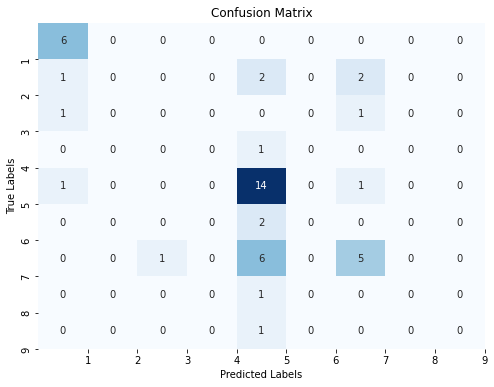

In [ ]:
display_confusion_matrix(vgg19_true_labels_list, vgg19_predicted_labels)

## [7.2] ResNet-101

In [ ]:
# Evaluate the model on the test data
resnet101_test_loss, resnet101_test_accuracy = loaded_resnet101_model.evaluate(X_test, y_test)
print(f"Test Loss: {resnet101_test_loss}, Test Accuracy: {resnet101_test_accuracy}")

2/2 [==============================] - 5s 867ms/step - loss: 2.0696 - accuracy: 0.2826
Test Loss: 2.069579601287842, Test Accuracy: 0.28260868787765503


In [ ]:
resnet101_predicted_labels, resnet101_true_labels_list = make_predictions_and_evaluate(loaded_resnet101_model, X_test, y_test)

2/2 [==============================] - 5s 826ms/step


In [ ]:
calculate_classification_metrics(resnet101_true_labels_list, resnet101_predicted_labels)

Accuracy: 0.2826
Precision: 0.1796
Recall: 0.1042
F1 Score: 0.1319


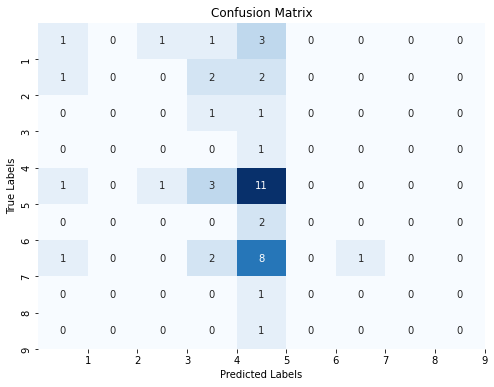

In [ ]:
display_confusion_matrix(resnet101_true_labels_list, resnet101_predicted_labels)

## [7.3] MobileNetV2

In [ ]:
# Evaluate the model on the test data
mobilenetv2_test_loss, mobilenetv2_test_accuracy = loaded_mobilenetv2_model.evaluate(X_test, y_test)
print(f"Test Loss: {mobilenetv2_test_loss}, Test Accuracy: {mobilenetv2_test_accuracy}")

2/2 [==============================] - 1s 82ms/step - loss: 7.0084 - accuracy: 0.5435
Test Loss: 7.008429527282715, Test Accuracy: 0.54347825050354


In [ ]:
mobilenetv2_predicted_labels, mobilenetv2_true_labels_list = make_predictions_and_evaluate(loaded_mobilenetv2_model, X_test, y_test)

2/2 [==============================] - 1s 124ms/step


In [ ]:
calculate_classification_metrics(mobilenetv2_true_labels_list, mobilenetv2_predicted_labels)

Accuracy: 0.5435
Precision: 0.2926
Recall: 0.3611
F1 Score: 0.3232


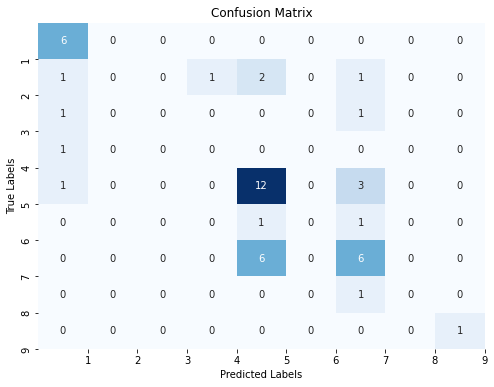

In [ ]:
display_confusion_matrix(mobilenetv2_true_labels_list, mobilenetv2_predicted_labels)

## [7.4] EfficientNet-B0

In [ ]:
# Extract the 'serving_default' signature
signature = loaded_efficientnet_model.signatures['serving_default']

# Get the inference function or model signature
infer = signature

# Convert input data to float32 if it's not already
efficientnet_X_test = X_test.astype(np.float32)

# Perform evaluation on test data
output = infer(tf.constant(efficientnet_X_test))
predictions = output[list(output.keys())[0]]  # Adjust this based on the output key of your model

# Convert probabilities to class labels (assuming one-hot encoding)
efficientnet_predicted_labels = np.argmax(predictions, axis=1)

# Convert true labels to class labels (assuming one-hot encoding)
efficientnet_true_labels = np.argmax(y_test, axis=1)

# Calculate test loss
efficientnet_test_loss = tf.keras.losses.categorical_crossentropy(y_test, predictions).numpy().mean()

# Calculate evaluation metrics (e.g., accuracy)
efficientnet_test_accuracy = np.mean(efficientnet_predicted_labels == efficientnet_true_labels)
print(f"Test Loss: {efficientnet_test_loss}, Test Accuracy: {efficientnet_test_accuracy}")

Test Loss: 2.345928907394409, Test Accuracy: 0.2608695652173913


In [ ]:
calculate_classification_metrics(efficientnet_true_labels, efficientnet_predicted_labels)

Accuracy: 0.2609
Precision: 0.0290
Recall: 0.1111
F1 Score: 0.0460


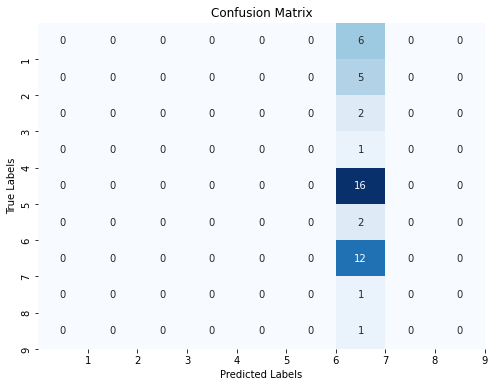

In [ ]:
display_confusion_matrix(efficientnet_true_labels, efficientnet_predicted_labels)